In [1]:
import pandas as pd
import numpy as np
import setting as st

dates = st.dv.dates

In [315]:
data_frames = {}  
date_keys = []
# create data_frames[date]
for date in dates:
    date_formatted = date.replace('-', '_') 
    file_path = f'data/ceac_{date_formatted}.csv' 
    df = pd.read_csv(file_path) 
    date_key = f'2023-{date}'
    data_frames[date_key] = df
    date_keys.append(date_key)


#date_keys

In [316]:
data_frames['2023-01-17']

,region,caseNumber,caseNumberFull,consulate,status,submitDate,statusDate,Issued,AP,Ready,Refused,Refused221g,InTransit,Transfer,NVC
0,AF,3,2023AF3,NRB,Issued,14-Oct-2021,18-Oct-2022,1,0,0,0,0,0,0,0
1,AF,4,2023AF4,NaN,NVC,NaN,NaN,0,0,0,0,0,0,0,1
2,AF,5,2023AF5,NaN,NVC,NaN,NaN,0,0,0,0,0,0,0,1
3,AF,6,2023AF6,KGL,Issued,14-Oct-2021,09-Dec-2022,1,0,0,0,0,0,0,0
4,AF,10,2023AF10,NaN,NVC,NaN,NaN,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63117,SA,3153,2023SA3153,NaN,NVC,NaN,NaN,0,0,0,0,0,0,0,1
63118,SA,3154,2023SA3154,NaN,NVC,NaN,NaN,0,0,0,0,0,0,0,1
63119,SA,3155,2023SA3155,NaN,NVC,NaN,NaN,0,0,0,0,0,0,0,1
63120,SA,3156,2023SA3156,NaN,NVC,NaN,NaN,0,0,0,0,0,0,0,1


In [317]:
# Создайте словарь или список для хранения результатов для каждого DataFrame
results = {}

# Переберите каждый DataFrame в цикле
for name, df in data_frames.items():
    # Выполните операции, которые вам нужны, для текущего DataFrame df
    refused221g = df[(df['Refused221g'] > 0)].groupby('consulate').aggregate({'Refused221g': 'count'}).sort_values(by='Refused221g', ascending=False)
    refused221g_BCH = df[ (df['Refused221g'] > 0) & (df['consulate'] == 'BCH')]
    myCase = df[(df['caseNumberFull'] == myFullCaseNumber)]
    visas = df.groupby('consulate').aggregate({'Issued': 'sum'})

    # Сохраните результаты в словаре results, используя имя или идентификатор
    results[name] = {
        'refused221g': refused221g,
        'refused221g_BCH': refused221g_BCH,
        'myCase': myCase,
        'visas': visas
    }

In [318]:
consulate = 'BCH'

In [319]:
ref = {}

for date in date_keys:
    #ref[date] = data_frames[date][(data_frames[date]['Refused221g'] > 0)]
    df_ref221g = results[date]['refused221g']
    ref[date] = df_ref221g[df_ref221g['Refused221g'] > 0] 

ref221g = pd.concat([ref[date] for date in date_keys], axis = 1)
ref221g.columns = date_keys

column_sums = ref221g.sum().to_frame().T
column_sums.index = ["SUM"]
ref221g = pd.concat([ref221g, column_sums])

#ref221g[ref221g.index == consulate]
ref221g


,2023-01-17,2023-01-18,2023-01-19,2023-01-20,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-29,...,2023-08-08,2023-08-09,2023-08-10,2023-08-11,2023-08-14,2023-08-25,2023-08-28,2023-08-29,2023-08-30,2023-09-02
CSB,64.0,63.0,59.0,59.0,67.0,81.0,81.0,83.0,85.0,82.0,...,188.0,187.0,186.0,169.0,169.0,112.0,112.0,99.0,83.0,78.0
WRW,62.0,64.0,68.0,68.0,73.0,73.0,72.0,67.0,67.0,67.0,...,142.0,141.0,137.0,131.0,131.0,119.0,120.0,119.0,108.0,116.0
ANK,53.0,54.0,53.0,63.0,60.0,59.0,59.0,58.0,63.0,63.0,...,223.0,221.0,219.0,219.0,217.0,187.0,186.0,174.0,158.0,128.0
DJI,52.0,50.0,54.0,54.0,55.0,55.0,55.0,59.0,59.0,63.0,...,120.0,118.0,118.0,118.0,117.0,110.0,109.0,106.0,100.0,105.0
TBL,41.0,40.0,40.0,40.0,39.0,39.0,39.0,34.0,24.0,24.0,...,34.0,32.0,32.0,31.0,31.0,30.0,30.0,30.0,30.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RKJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
KMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0


In [320]:
iss = {}

for date in date_keys:
    #ref[date] = data_frames[date][(data_frames[date]['Refused221g'] > 0)]
    df_issued = results[date]['visas']
    iss[date] = df_issued

issued = pd.concat([iss[date] for date in date_keys], axis = 1)
issued.columns = date_keys
column_sums = issued.sum().to_frame().T
column_sums.index = ["SUM"]
issued = pd.concat([issued, column_sums])
issued[issued.index == consulate]

,2023-01-17,2023-01-18,2023-01-19,2023-01-20,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-29,...,2023-08-08,2023-08-09,2023-08-10,2023-08-11,2023-08-14,2023-08-25,2023-08-28,2023-08-29,2023-08-30,2023-09-02
BCH,30.0,33.0,36.0,42.0,42.0,42.0,42.0,47.0,48.0,48.0,...,268.0,274.0,284.0,291.0,291.0,317.0,326.0,332.0,355.0,355.0


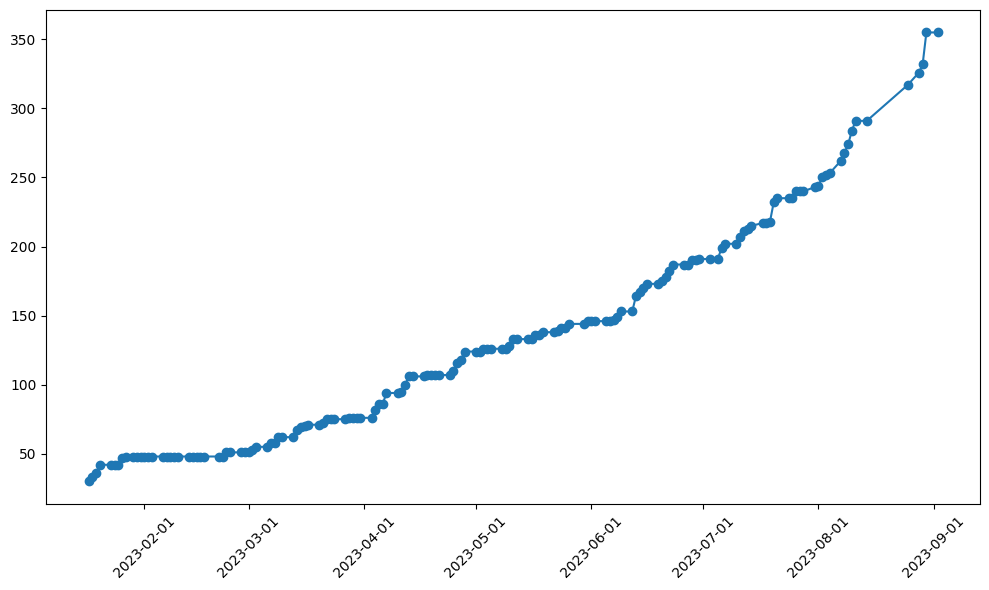

In [321]:
import matplotlib.pyplot as plt

date_objects = pd.to_datetime(date_keys)
#values = issued.loc[consulate]
values = issued.loc[consulate]

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(date_objects, values, marker='o', linestyle='-')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()

In [348]:
date = '2023-09-02'
cons = 'BCH'

data_frames[date][(data_frames[date]['consulate'] == cons) & (data_frames[date]['Refused221g'] > 0)]

,region,caseNumber,caseNumberFull,consulate,status,submitDate,statusDate,Issued,AP,Ready,Refused,Refused221g,InTransit,Transfer,NVC,2nlDate
113916,EU,24289,2023EU24289,BCH,Refused221g,2021-Nov-01,2023-Aug-21,0,0,1,0,1,0,0,0,2023-Apr-21
115542,EU,25915,2023EU25915,BCH,Refused,2021-Nov-03,2023-Aug-30,0,0,0,2,1,0,0,0,2023-May-19
118268,EU,28641,2023EU28641,BCH,Refused221g,2021-Oct-23,2023-Aug-21,0,0,0,0,2,0,0,0,2023-Jun-16


In [323]:
# date_start = '2023-08-29'
# date_finish = '2023-08-30'
# #date_finish = '2023-09-02'

# df_ref221g = results[date_start]['refused221g'] - results[date_finish]['refused221g']
# df_ref221g[df_ref221g['Refused221g'] > 0].sort_values(by='Refused221g', ascending=False)

In [324]:
# date_start = '2023-08-30'
# #date_finish = '2023-08-30'
# date_finish = '2023-09-02'

# df_ref221g = results[date_start]['refused221g'] - results[date_finish]['refused221g']
# df_ref221g[df_ref221g['Refused221g'] > 0].sort_values(by='Refused221g', ascending=False)

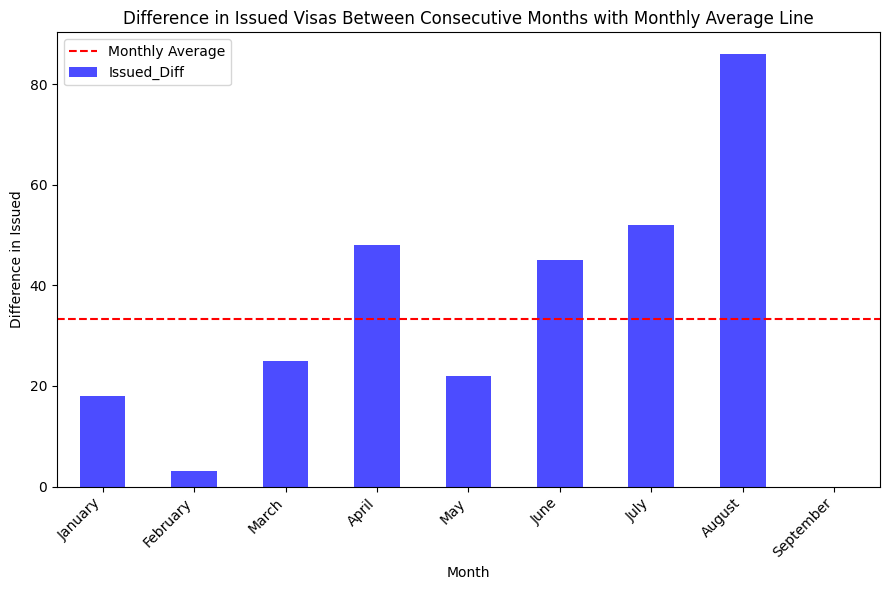

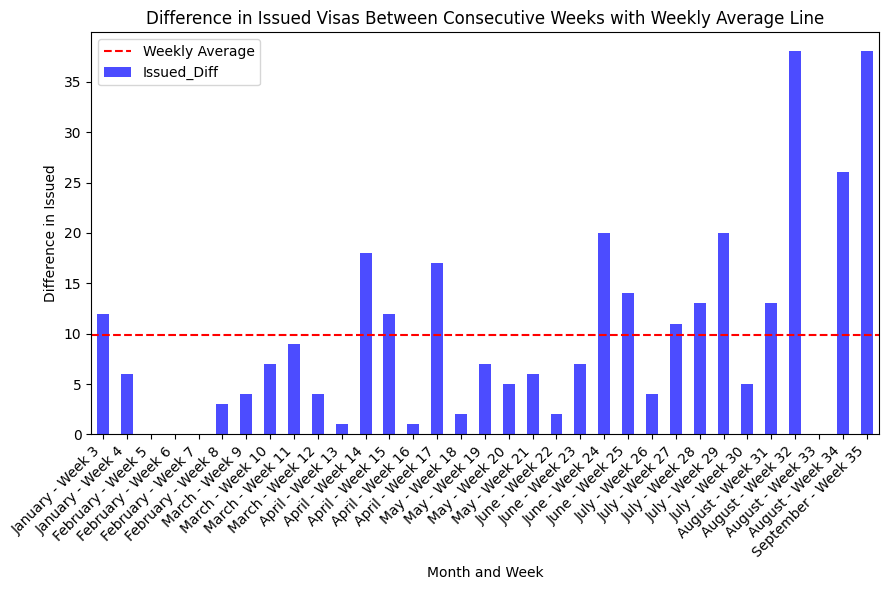

In [351]:

data = {'Date': date_keys,
        'Issued': values}


plot_bar_month(data)
plot_bar_week(data)